In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
%store -r df_QCX
%store -r df_pilas

In [4]:
df_QCX = df_QCX
df_pilas = df_pilas

# 0. Cambio tipo de datos

In [5]:
df_pilas = df_pilas.astype({
    'Index': 'int64',
    ' Time': 'datetime64[ns]',
    ' Mound': 'object',
    ' Comment': 'object',
    'idPila': 'int64'
})

# Reemplazar valores no numéricos (como espacios en blanco) con NaN
cols_to_convert = [
    ' "LSF"  [CurrentAnalysis.Dry basis]', ' "LSF"  [Rolling.Analysis1.Dry basis]', ' "SM"  [Rolling.Analysis1.Dry basis]',
    ' "IM"  [Rolling.Analysis1.Dry basis]', ' "Tph"  [Rolling.Analysis1.Dry basis]', ' "IM"  [CurrentProduct.Dry basis]',
    ' "LSF"  [CurrentProduct.Dry basis]', ' "SM"  [CurrentProduct.Dry basis]', ' "Tph"  [CurrentProduct.Dry basis]',
    ' "CaO"  [CurrentProduct.Dry basis]', ' "CaO"  [Rolling.Analysis1.Dry basis]', ' "MgO"  [CurrentProduct.Dry basis]',
    ' "MgO"  [Rolling.Analysis1.Dry basis]', ' "Al2O3"  [CurrentProduct.Dry basis]', ' "Fe2O3"  [CurrentProduct.Dry basis]',
    ' "Al2O3"  [Rolling.Analysis1.Dry basis]', ' "Fe2O3"  [Rolling.Analysis1.Dry basis]', ' "SiO2"  [CurrentProduct.Dry basis]',
    ' "SiO2"  [Rolling.Analysis1.Dry basis]', ' "SM"  [CurrentAnalysis.Dry basis]', ' "CaO"  [CurrentAnalysis.Dry basis]',
    ' "MgO"  [CurrentAnalysis.Dry basis]', ' "IM"  [CurrentAnalysis.Dry basis]', ' "Fe2O3"  [CurrentAnalysis.Dry basis]',
    ' "Al2O3"  [CurrentAnalysis.Dry basis]', ' "SiO2"  [CurrentAnalysis.Dry basis]', ' "Tph"  [CurrentAnalysis.Dry basis]',
    ' "Tons"  [CurrentProduct.Dry basis]'
]

# Reemplazar valores no numéricos o espacios en blanco con NaN en las columnas especificadas
df_pilas[cols_to_convert] = df_pilas[cols_to_convert].replace(r'^\s*$', np.nan, regex=True)

# Intentar nuevamente convertir las columnas a float64
df_pilas[cols_to_convert] = df_pilas[cols_to_convert].astype('float64')

# Verificar los tipos de datos
print(df_pilas.dtypes)

Index                                               int64
 Time                                      datetime64[ns]
 Period                                           float64
 Seconds since                                    float64
 Mound                                             object
 Comment                                           object
 "LSF"  [CurrentAnalysis.Dry basis]               float64
 "LSF"  [Rolling.Analysis1.Dry basis]             float64
 "SM"  [Rolling.Analysis1.Dry basis]              float64
 "IM"  [Rolling.Analysis1.Dry basis]              float64
 "Tph"  [Rolling.Analysis1.Dry basis]             float64
 "IM"  [CurrentProduct.Dry basis]                 float64
 "LSF"  [CurrentProduct.Dry basis]                float64
 "SM"  [CurrentProduct.Dry basis]                 float64
 "Tph"  [CurrentProduct.Dry basis]                float64
 "CaO"  [CurrentProduct.Dry basis]                float64
 "CaO"  [Rolling.Analysis1.Dry basis]             float64
 "MgO"  [Curre

In [6]:
# Lista de columnas a procesar
cols_to_convert2 = [
    'FCAO', 'SiO2', 'Al2O3',
    'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O', 'C3S', 'C2S', 'C3A',
    'C4AF', 'A/S', 'idPila'
]

# Reemplazar cualquier valor que no sea numérico por NaN en las columnas especificadas
df_QCX[cols_to_convert2] = df_QCX[cols_to_convert2].applymap(lambda x: np.nan if not str(x).replace('.', '', 1).isdigit() else x)

# Verificar los tipos de datos después del reemplazo
df_QCX.dtypes

C:\Users\julit\AppData\Local\Temp\ipykernel_27096\3921530317.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QCX[cols_to_convert2] = df_QCX[cols_to_convert2].applymap(lambda x: np.nan if not str(x).replace('.', '', 1).isdigit() else x)


fecha         datetime64[ns]
fecha-hora    datetime64[ns]
id_eq                 object
Muestra #              int64
FCAO                 float64
SiO2                 float64
Al2O3                float64
Fe2O3                float64
CaO                  float64
MgO                  float64
SO3                  float64
K2O                  float64
Na2O                 float64
C3S                  float64
C2S                  float64
C3A                  float64
C4AF                 float64
A/S                  float64
idPila               float64
dtype: object

# 1. Análisis Exploratorio de Datos (EDA) df_pilas

In [7]:
# Mostrar información básica
print(f"El DataFrame tiene {df_pilas.shape[0]} filas y {df_pilas.shape[1]} columnas.")
print("\nNombres de las columnas:")
df_pilas.columns

El DataFrame tiene 142393 filas y 35 columnas.

Nombres de las columnas:


Index(['Index', ' Time', ' Period', ' Seconds since', ' Mound', ' Comment',
       ' "LSF"  [CurrentAnalysis.Dry basis]',
       ' "LSF"  [Rolling.Analysis1.Dry basis]',
       ' "SM"  [Rolling.Analysis1.Dry basis]',
       ' "IM"  [Rolling.Analysis1.Dry basis]',
       ' "Tph"  [Rolling.Analysis1.Dry basis]',
       ' "IM"  [CurrentProduct.Dry basis]',
       ' "LSF"  [CurrentProduct.Dry basis]',
       ' "SM"  [CurrentProduct.Dry basis]',
       ' "Tph"  [CurrentProduct.Dry basis]',
       ' "CaO"  [CurrentProduct.Dry basis]',
       ' "CaO"  [Rolling.Analysis1.Dry basis]',
       ' "MgO"  [CurrentProduct.Dry basis]',
       ' "MgO"  [Rolling.Analysis1.Dry basis]',
       ' "Al2O3"  [CurrentProduct.Dry basis]',
       ' "Fe2O3"  [CurrentProduct.Dry basis]',
       ' "Al2O3"  [Rolling.Analysis1.Dry basis]',
       ' "Fe2O3"  [Rolling.Analysis1.Dry basis]',
       ' "SiO2"  [CurrentProduct.Dry basis]',
       ' "SiO2"  [Rolling.Analysis1.Dry basis]',
       ' "SM"  [CurrentAnalysis.Dry

In [8]:
# Mostrar las primeras filas del DataFrame df_pilas
print("\nPrimeras filas del DataFrame:")
df_pilas.head()


Primeras filas del DataFrame:


,Index,Time,Period,Seconds since,Mound,Comment,"""LSF"" [CurrentAnalysis.Dry basis]","""LSF"" [Rolling.Analysis1.Dry basis]","""SM"" [Rolling.Analysis1.Dry basis]","""IM"" [Rolling.Analysis1.Dry basis]",...,"""SM"" [CurrentAnalysis.Dry basis]","""CaO"" [CurrentAnalysis.Dry basis]","""MgO"" [CurrentAnalysis.Dry basis]","""IM"" [CurrentAnalysis.Dry basis]","""Fe2O3"" [CurrentAnalysis.Dry basis]","""Al2O3"" [CurrentAnalysis.Dry basis]","""SiO2"" [CurrentAnalysis.Dry basis]","""Tph"" [CurrentAnalysis.Dry basis]","""Tons"" [CurrentProduct.Dry basis]",idPila
0,1,2023-01-01 14:11:30,60.060,0.00,Pila 0123 Sur[Pila 10322 norte],AC mantencion 03-03-2016 .,85.36614,89.48588,2.90785,2.37234,...,4.26911,41.25781,2.36092,1.65372,1.40812,2.32864,15.95262,1118.86,NaN,123
1,2,2023-01-01 14:12:30,60.058,60.06,Pila 0123 Sur[Pila 10322 norte],AC mantencion 03-03-2016 .,87.28462,89.37545,2.96634,2.33612,...,3.38848,42.71772,1.19249,2.11807,1.49516,3.16685,15.79714,1121.64,NaN,123
2,3,2023-01-01 14:13:30,60.061,60.06,Pila 0123 Sur[Pila 10322 norte],AC mantencion 03-03-2016 .,88.86168,89.51137,3.01566,2.30483,...,3.82237,41.63558,2.91829,1.90047,1.38070,2.62398,15.30737,1162.18,NaN,123
3,4,2023-01-01 14:14:30,60.060,60.06,Pila 0123 Sur[Pila 10322 norte],AC mantencion 03-03-2016 .,81.11225,89.28863,3.08354,2.27769,...,3.90974,39.55174,3.97634,1.88807,1.41361,2.66900,15.96195,1205.73,NaN,123
4,5,2023-01-01 14:15:30,60.061,60.06,Pila 0123 Sur[Pila 10322 norte],AC mantencion 03-03-2016 .,73.10878,88.31500,3.09132,2.29887,...,2.93623,38.92155,3.27556,2.47363,1.65710,4.09905,16.90138,1041.25,NaN,123


In [9]:
# 1. Tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(df_pilas.dtypes)


Tipos de datos de las columnas:
Index                                               int64
 Time                                      datetime64[ns]
 Period                                           float64
 Seconds since                                    float64
 Mound                                             object
 Comment                                           object
 "LSF"  [CurrentAnalysis.Dry basis]               float64
 "LSF"  [Rolling.Analysis1.Dry basis]             float64
 "SM"  [Rolling.Analysis1.Dry basis]              float64
 "IM"  [Rolling.Analysis1.Dry basis]              float64
 "Tph"  [Rolling.Analysis1.Dry basis]             float64
 "IM"  [CurrentProduct.Dry basis]                 float64
 "LSF"  [CurrentProduct.Dry basis]                float64
 "SM"  [CurrentProduct.Dry basis]                 float64
 "Tph"  [CurrentProduct.Dry basis]                float64
 "CaO"  [CurrentProduct.Dry basis]                float64
 "CaO"  [Rolling.Analysis1.Dry basis]  

In [10]:
# 2. Valores nulos por columna
print("\nValores nulos por columna:")
df_pilas.isnull().mean()


Valores nulos por columna:


Index                                      0.000000
 Time                                      0.000000
 Period                                    0.000000
 Seconds since                             0.000000
 Mound                                     0.000000
 Comment                                   0.000000
 "LSF"  [CurrentAnalysis.Dry basis]        0.000520
 "LSF"  [Rolling.Analysis1.Dry basis]      0.000520
 "SM"  [Rolling.Analysis1.Dry basis]       0.000520
 "IM"  [Rolling.Analysis1.Dry basis]       0.000520
 "Tph"  [Rolling.Analysis1.Dry basis]      0.000520
 "IM"  [CurrentProduct.Dry basis]          0.000499
 "LSF"  [CurrentProduct.Dry basis]         0.000499
 "SM"  [CurrentProduct.Dry basis]          0.000499
 "Tph"  [CurrentProduct.Dry basis]         0.000499
 "CaO"  [CurrentProduct.Dry basis]         0.000499
 "CaO"  [Rolling.Analysis1.Dry basis]      0.000520
 "MgO"  [CurrentProduct.Dry basis]         0.000499
 "MgO"  [Rolling.Analysis1.Dry basis]      0.000520
 "Al2O3"  [C

In [11]:
# 3. Estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico:")
df_pilas.describe()


Resumen estadístico:


,Index,Time,Period,Seconds since,"""LSF"" [CurrentAnalysis.Dry basis]","""LSF"" [Rolling.Analysis1.Dry basis]","""SM"" [Rolling.Analysis1.Dry basis]","""IM"" [Rolling.Analysis1.Dry basis]","""Tph"" [Rolling.Analysis1.Dry basis]","""IM"" [CurrentProduct.Dry basis]",...,"""SM"" [CurrentAnalysis.Dry basis]","""CaO"" [CurrentAnalysis.Dry basis]","""MgO"" [CurrentAnalysis.Dry basis]","""IM"" [CurrentAnalysis.Dry basis]","""Fe2O3"" [CurrentAnalysis.Dry basis]","""Al2O3"" [CurrentAnalysis.Dry basis]","""SiO2"" [CurrentAnalysis.Dry basis]","""Tph"" [CurrentAnalysis.Dry basis]","""Tons"" [CurrentProduct.Dry basis]",idPila
count,142393.000000,142393,142393.000000,142393.000000,142319.000000,142319.000000,142319.000000,142319.000000,142319.000000,142322.000000,...,142319.000000,142319.000000,89359.000000,142319.000000,140920.000000,140920.000000,142319.000000,133487.000000,57371.000000,142393.000000
mean,734.933185,2023-07-10 12:41:43.904138496,60.170473,118.328590,92.795545,92.390621,2.953975,2.198530,1143.139258,2.190448,...,2.976456,41.576454,2.691969,2.219949,1.536494,3.361318,14.403861,1141.237543,14245.345199,5002.136201
min,1.000000,2023-01-01 14:11:30,5.315000,-4276.300000,12.827050,60.732240,2.145690,1.424860,841.554350,1.435090,...,1.770200,25.076540,-16.646620,0.684080,0.088610,0.554400,7.174400,688.171000,14.912900,123.000000
25%,367.000000,2023-04-12 08:49:00,60.059000,60.060000,85.506280,87.793115,2.821045,2.074630,1116.752325,2.142320,...,2.719685,40.640760,2.071085,1.942575,1.387270,3.002580,13.488440,1102.380000,7222.118850,2623.000000
50%,734.000000,2023-07-07 20:17:28,60.060000,60.060000,92.165090,92.067290,2.939560,2.192810,1145.301700,2.187290,...,2.937120,41.596910,2.683860,2.194940,1.523850,3.352490,14.350320,1143.880000,14251.706600,5023.000000
75%,1101.000000,2023-10-08 07:41:10,60.061000,60.060000,99.298675,96.514835,3.066730,2.318450,1172.498290,2.237390,...,3.186625,42.537655,3.296180,2.466305,1.672160,3.710583,15.262750,1183.520000,21271.197000,7423.000000
max,1546.000000,2024-07-11 10:27:29,96.094000,120409.090000,199.526620,298.275870,5.432700,4.305530,1403.890320,4.286590,...,10.456630,49.425990,11.083060,43.553840,3.040990,7.121200,78.030370,1457.100000,29292.292900,9723.000000
std,424.491573,NaN,0.834181,1502.950109,11.157572,7.185590,0.205653,0.188836,46.016433,0.079291,...,0.379954,1.463868,0.957883,0.420378,0.222341,0.530963,1.415725,65.728753,8122.423609,2809.701191


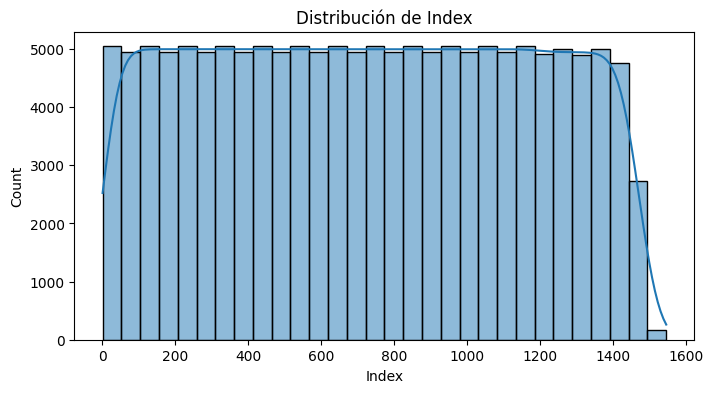

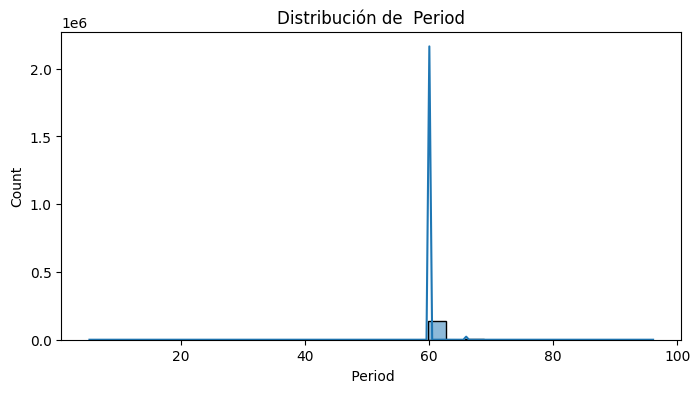

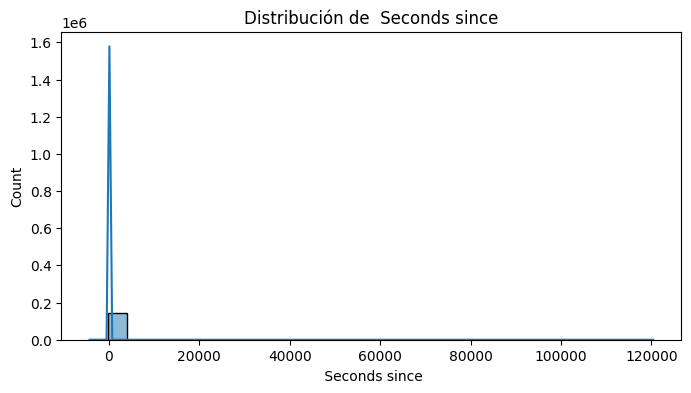

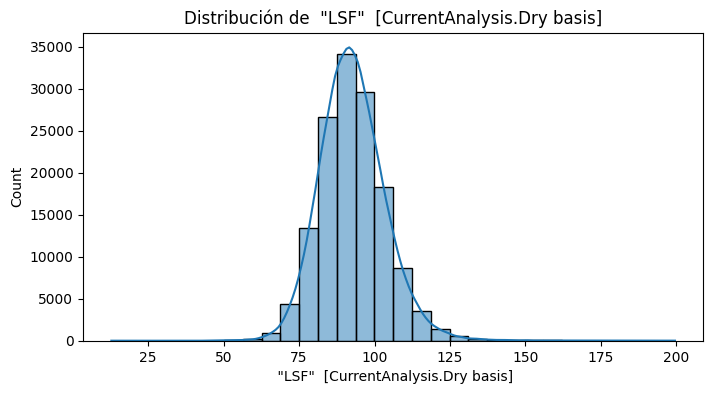

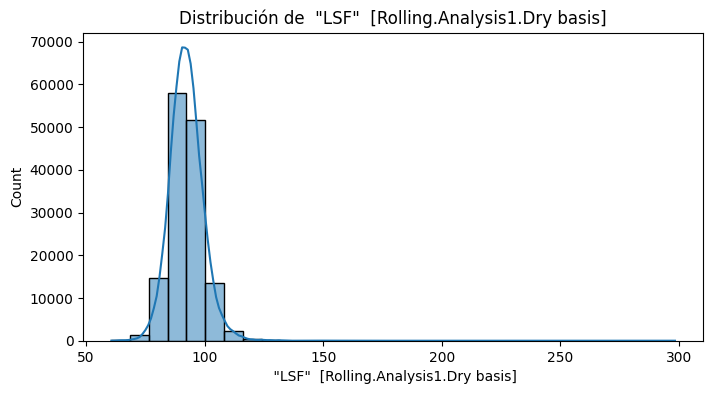

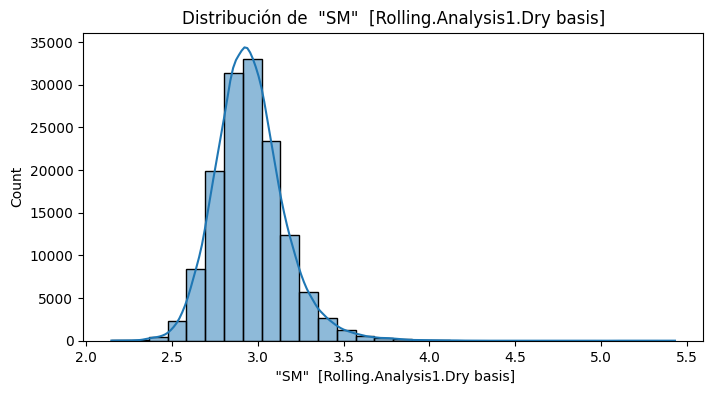

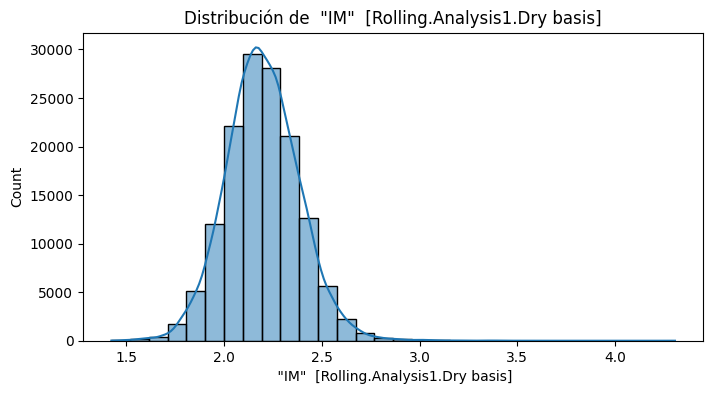

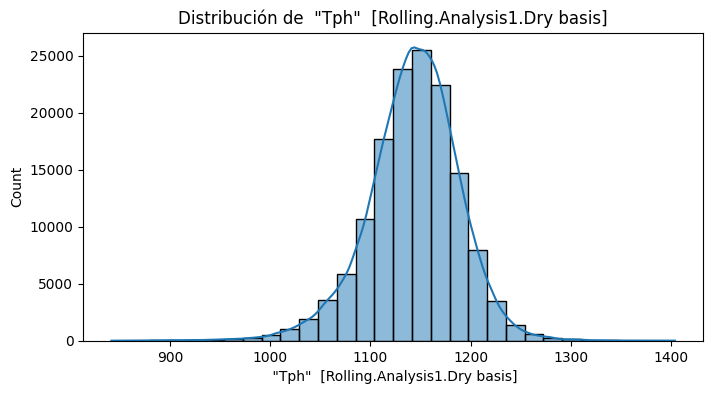

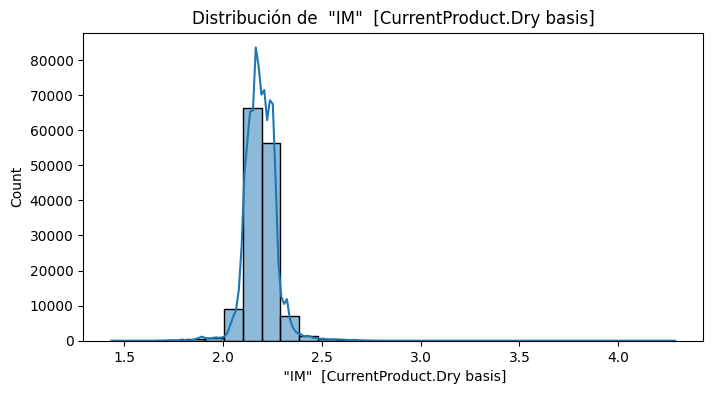

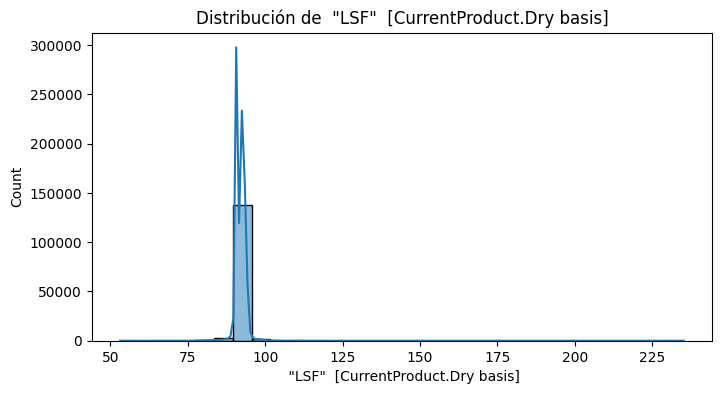

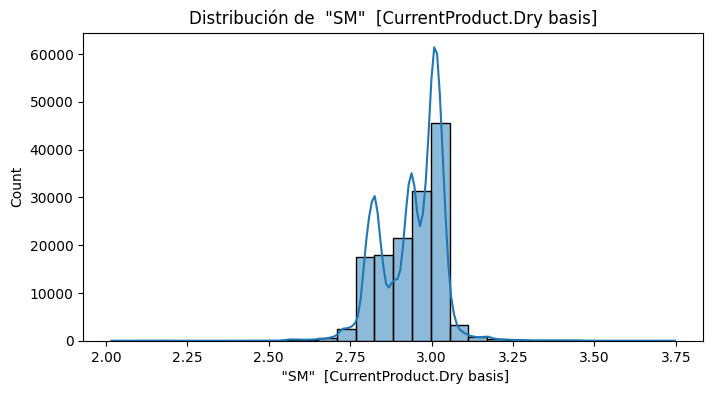

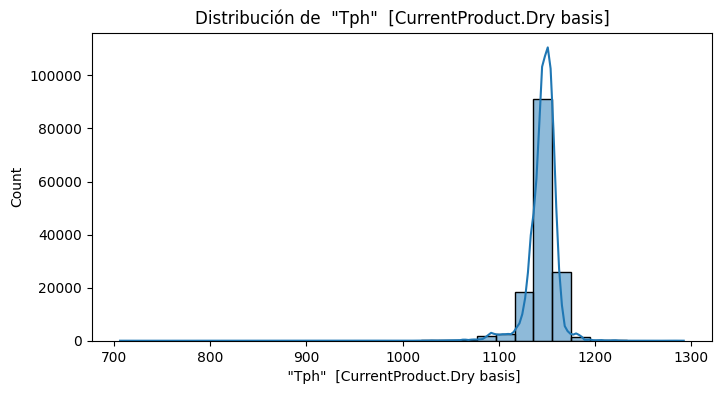

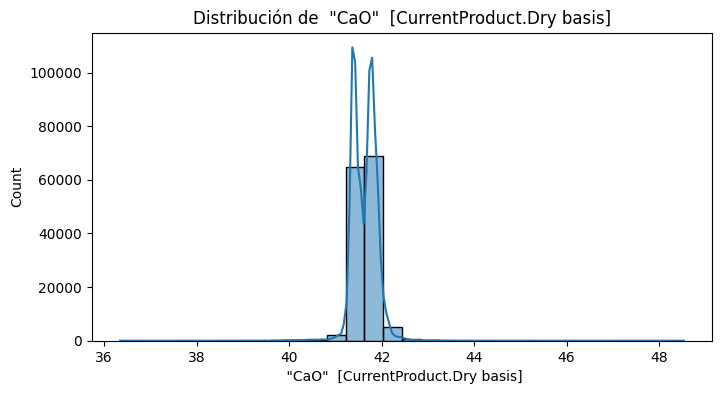

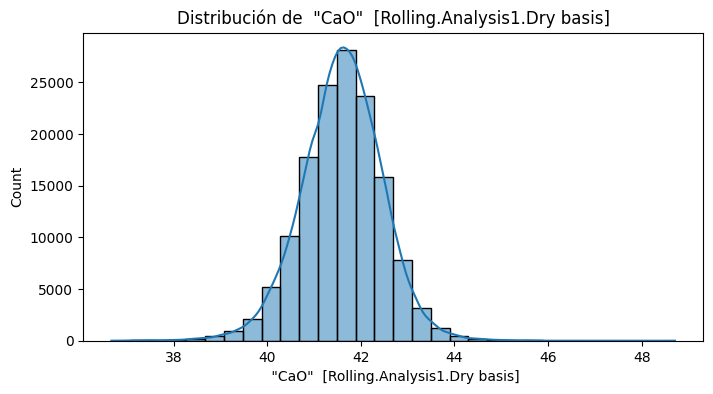

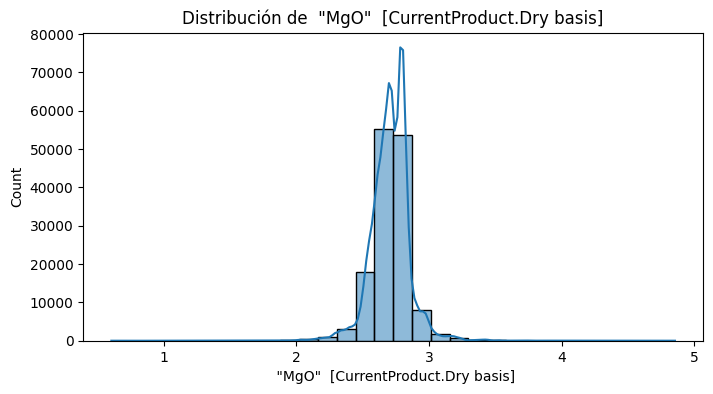

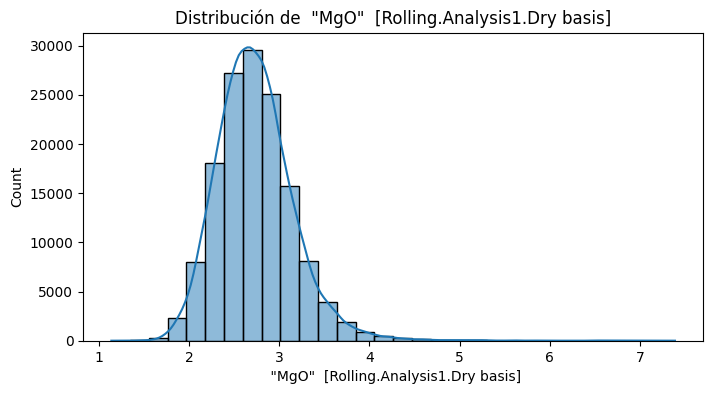

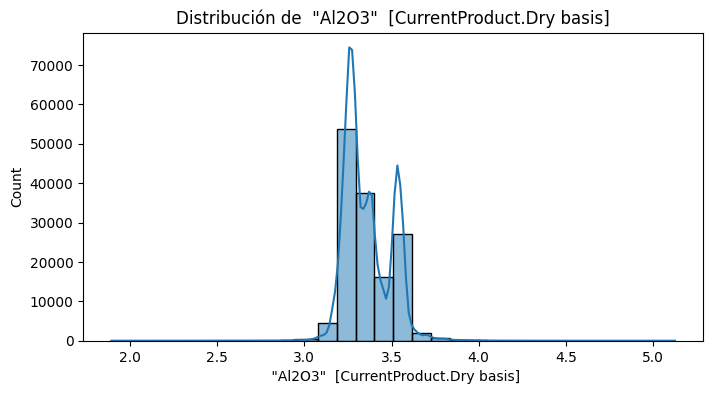

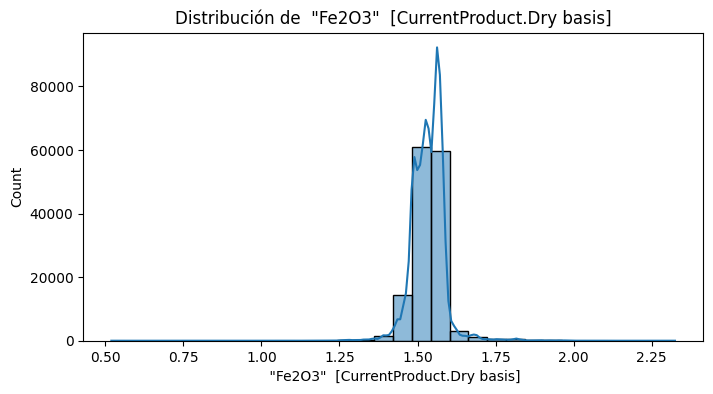

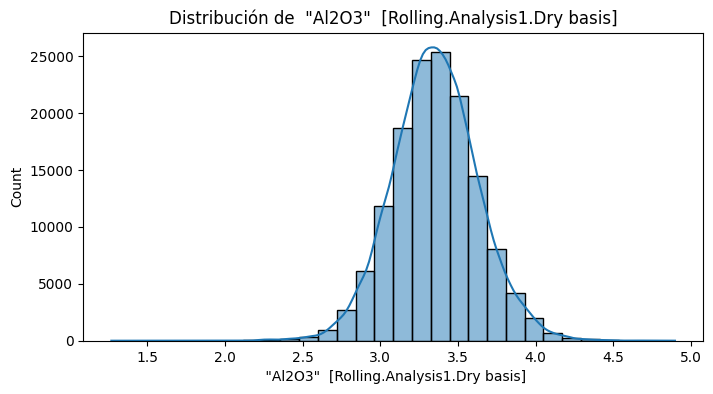

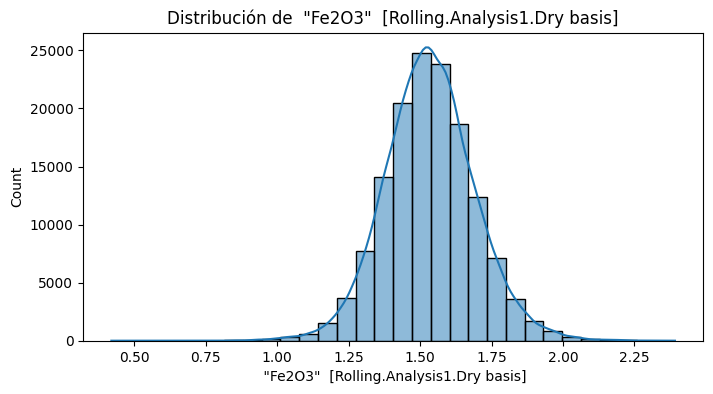

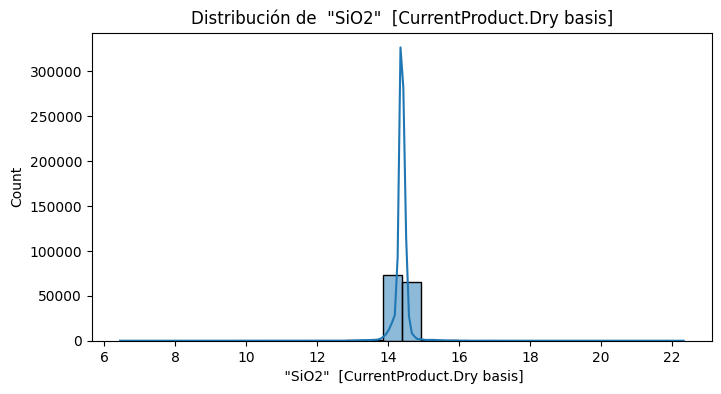

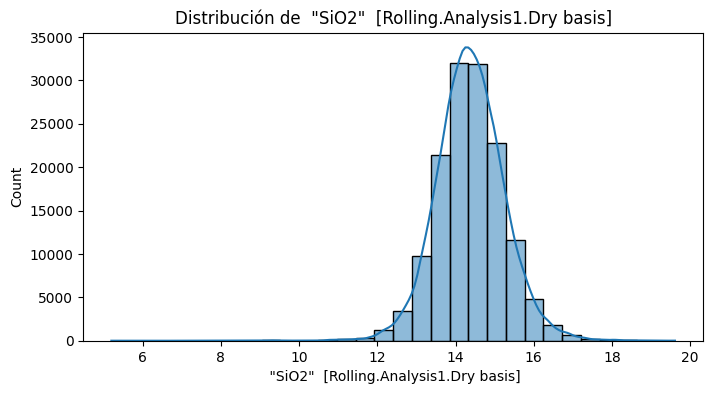

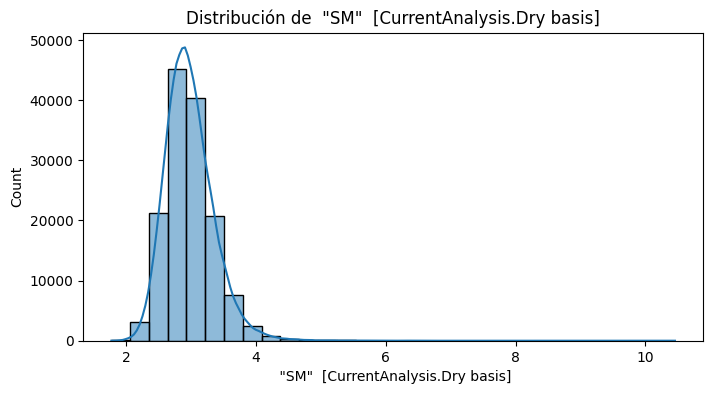

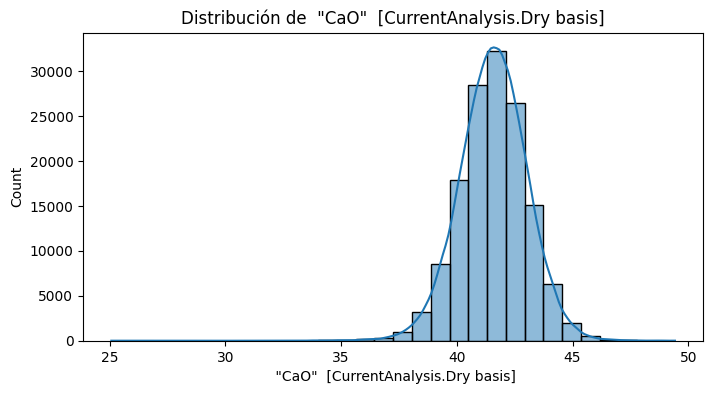

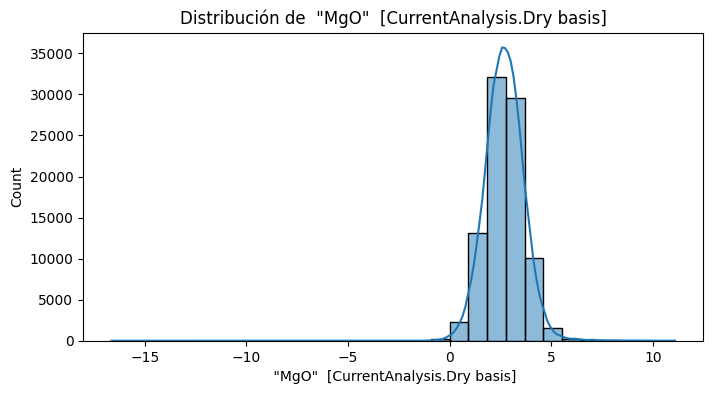

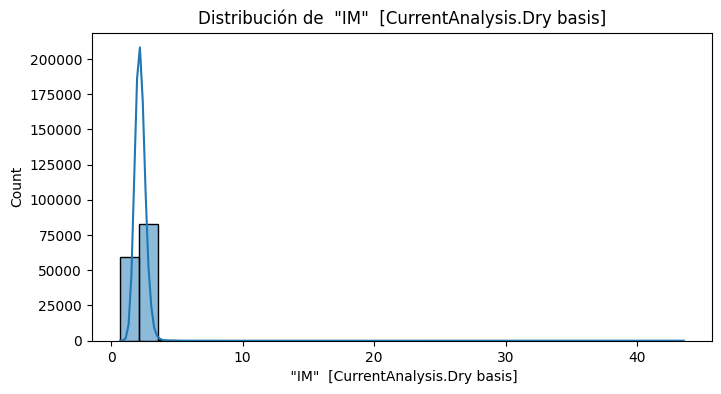

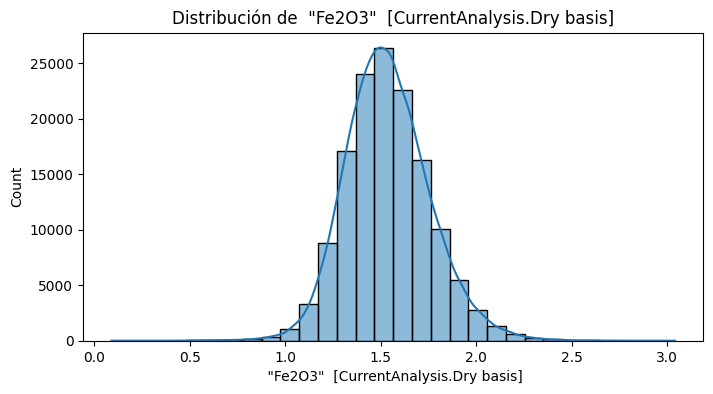

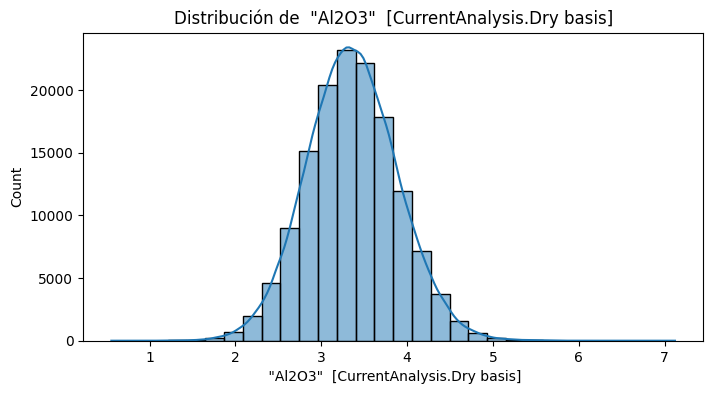

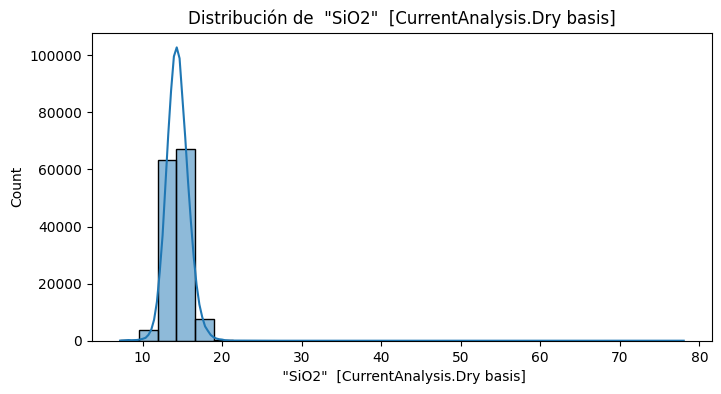

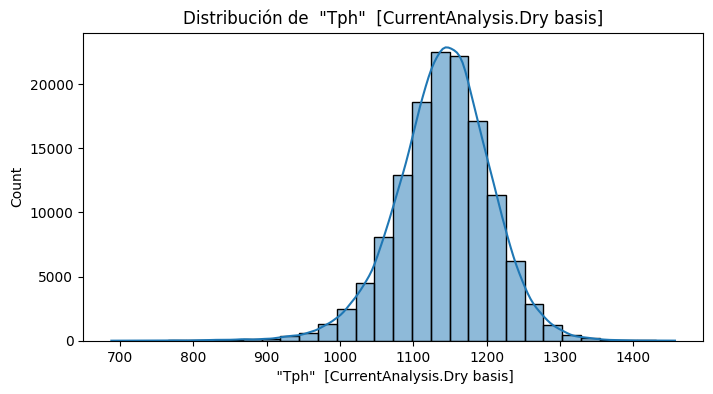

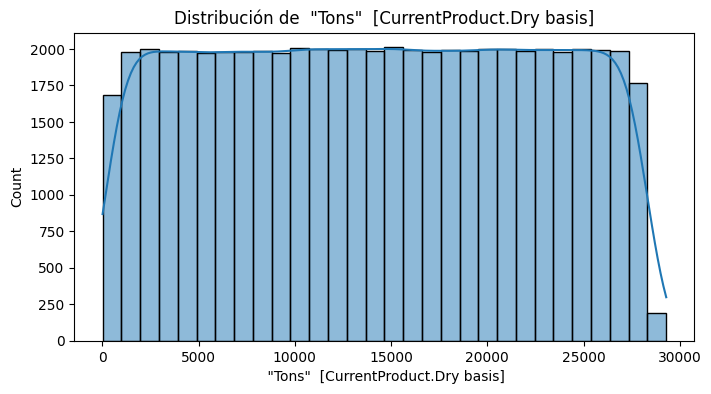

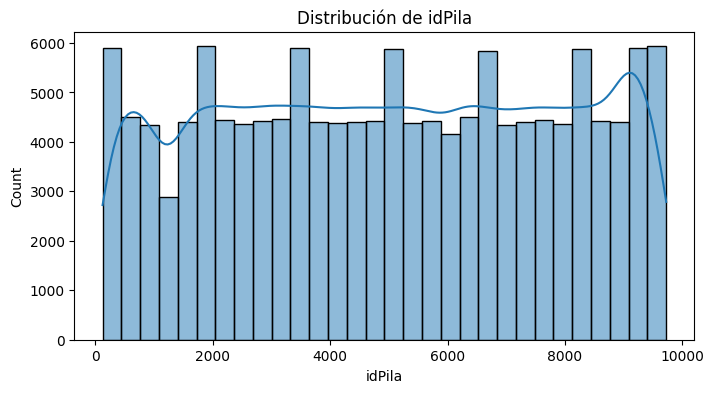

In [12]:
# 4. Visualización de distribuciones de variables numéricas
num_columns = df_pilas.select_dtypes(include=[np.number]).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_pilas[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()



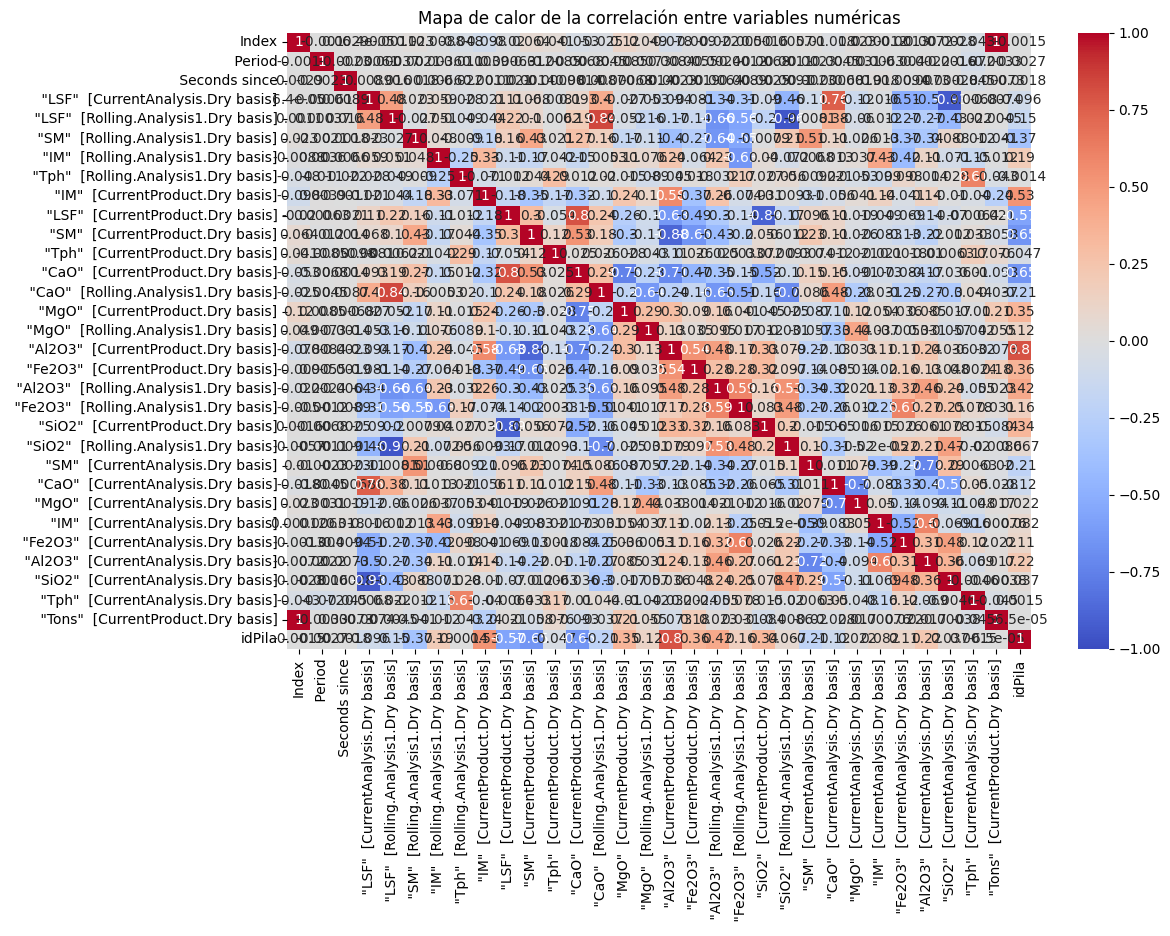

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pilas.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

# 2. Análisis Exploratorio de Datos (EDA) df_QCX

In [14]:
# Mostrar información básica
print(f"El DataFrame tiene {df_QCX.shape[0]} filas y {df_QCX.shape[1]} columnas.")
print("\nNombres de las columnas:")
df_QCX.columns

El DataFrame tiene 196779 filas y 19 columnas.

Nombres de las columnas:


Index(['fecha', 'fecha-hora', 'id_eq', 'Muestra #', 'FCAO', 'SiO2', 'Al2O3',
       'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O', 'C3S', 'C2S', 'C3A',
       'C4AF', 'A/S', 'idPila'],
      dtype='object')

In [15]:
# Mostrar las primeras filas del DataFrame df_QCX
print("\nPrimeras filas del DataFrame:")
df_QCX.head()


Primeras filas del DataFrame:


,fecha,fecha-hora,id_eq,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,C3S,C2S,C3A,C4AF,A/S,idPila
0,2019-01-01,2019-01-01 00:00:38,Aus_RM323,1478524,NaN,14.16677,3.409784,1.757292,42.01734,2.359858,0.104489,0.449430,0.199408,NaN,15.046283,6.062590,5.347440,6.123060,NaN
1,2019-01-01,2019-01-01 00:40:18,Man_CLK461,1478528,1.424847,21.01248,5.194796,2.515397,66.15322,3.540236,1.639114,0.640906,0.377616,65.318701,6.590723,9.510158,7.654353,0.630035,NaN
2,2019-01-01,2019-01-01 00:40:35,Aus_CLK463,1478529,1.463604,20.91105,5.145436,2.433739,66.25763,3.455422,1.649539,0.651268,0.351385,66.805214,5.059468,9.517519,7.405868,0.610880,NaN
3,2019-01-01,2019-01-01 00:44:52,Man_CLK462,1478530,1.707553,21.31690,5.215492,2.798341,67.94087,3.638040,0.128239,0.242341,0.254850,68.588091,4.128831,9.086261,8.515352,4.172559,NaN
4,2019-01-01,2019-01-01 01:00:38,Aus_RM323,1478531,NaN,13.55528,3.289323,1.687194,42.26035,2.369276,0.110288,0.432180,0.197379,NaN,8.354752,5.861974,5.134131,5.644265,NaN


In [16]:
# 1. Tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
df_QCX.dtypes


Tipos de datos de las columnas:


fecha         datetime64[ns]
fecha-hora    datetime64[ns]
id_eq                 object
Muestra #              int64
FCAO                 float64
SiO2                 float64
Al2O3                float64
Fe2O3                float64
CaO                  float64
MgO                  float64
SO3                  float64
K2O                  float64
Na2O                 float64
C3S                  float64
C2S                  float64
C3A                  float64
C4AF                 float64
A/S                  float64
idPila               float64
dtype: object

In [17]:
# 2. Valores nulos por columna
print("\nValores nulos por columna:")
df_QCX.isnull().mean()


Valores nulos por columna:


fecha         0.000000
fecha-hora    0.000000
id_eq         0.000000
Muestra #     0.000000
FCAO          0.693189
SiO2          0.093008
Al2O3         0.093008
Fe2O3         0.093008
CaO           0.093008
MgO           0.093018
SO3           0.027899
K2O           0.093008
Na2O          0.093150
C3S           0.709471
C2S           0.216410
C3A           0.093008
C4AF          0.093008
A/S           0.104345
idPila        0.447223
dtype: float64

In [18]:
# 3. Estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico:")
df_QCX.describe()


Resumen estadístico:


,fecha,fecha-hora,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,C3S,C2S,C3A,C4AF,A/S,idPila
count,196779,196779,1.967790e+05,60374.000000,178477.000000,178477.000000,178477.000000,178477.000000,178475.000000,191289.000000,178477.000000,178449.000000,57170.000000,154194.000000,178477.000000,178477.000000,176246.000000,108775.000000
mean,2021-07-14 03:02:12.873934592,2021-07-14 14:53:32.438436096,1.752478e+06,1.731691,15.767186,3.826405,1.856577,50.146190,2.496805,0.694661,0.555970,0.311376,66.769284,6.796148,6.998645,5.649565,20.856281,5297.490986
min,2019-01-01 00:00:00,2019-01-01 00:00:38,1.478524e+06,0.000000,4.411268,1.277544,0.490000,33.140000,0.010000,0.000000,0.030000,0.000000,2.293053,0.000106,0.872399,1.491070,0.004574,122.000000
25%,2020-03-18 00:00:00,2020-03-18 11:04:37,1.623848e+06,1.455551,13.290000,3.205347,1.553142,42.543170,2.050526,0.057252,0.468487,0.237166,65.486673,3.538682,5.842429,4.726211,0.805892,2922.000000
50%,2021-07-28 00:00:00,2021-07-28 21:02:40,1.754009e+06,1.690406,13.690000,3.357911,1.622047,42.978040,2.380000,0.140000,0.507988,0.277604,66.928704,5.394981,6.182513,4.935889,6.028294,5322.000000
75%,2022-10-23 00:00:00,2022-10-23 14:15:35.500000,1.886848e+06,1.919093,20.546000,4.930733,2.380000,65.579530,2.895826,1.479171,0.632309,0.380000,68.305089,7.875562,8.928060,7.242340,13.662471,7722.000000
max,2023-12-31 00:00:00,2023-12-31 23:40:33,2.003526e+06,12.765030,31.450000,7.690000,4.500000,70.690000,266.000000,259.000000,349.000000,49.000000,83.586189,193.197332,14.644580,13.693500,809653.934485,10322.000000
std,NaN,NaN,1.528285e+05,0.489653,3.453991,0.851809,0.419837,10.869498,1.065113,1.118299,1.091689,0.345352,2.840242,5.793975,1.569786,1.277565,1936.565296,2810.505131


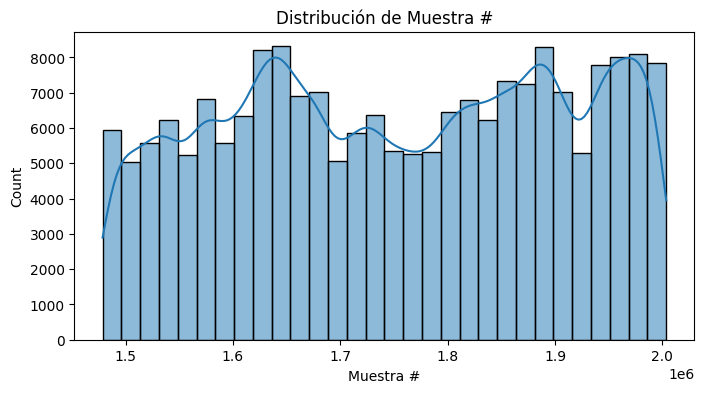

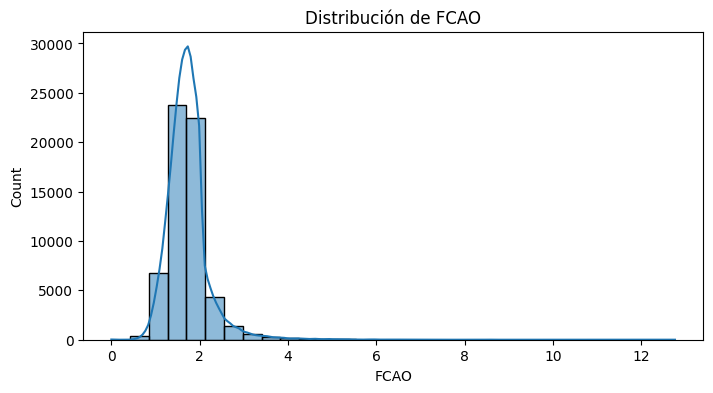

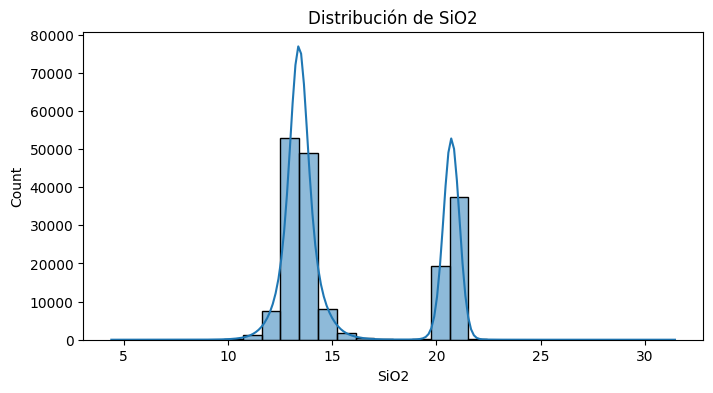

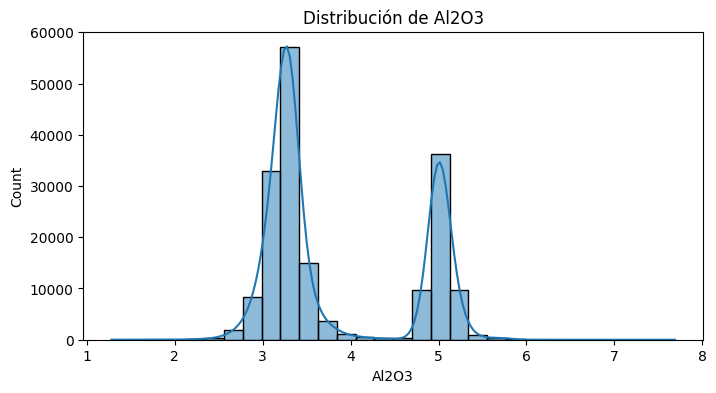

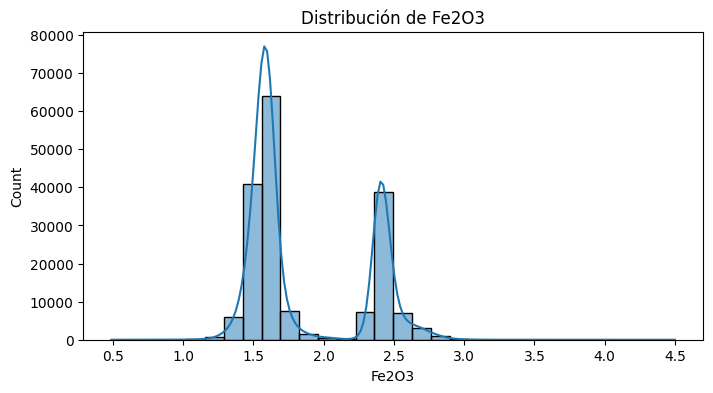

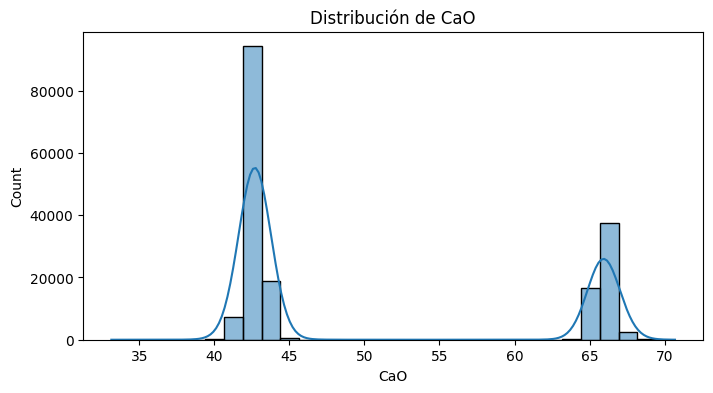

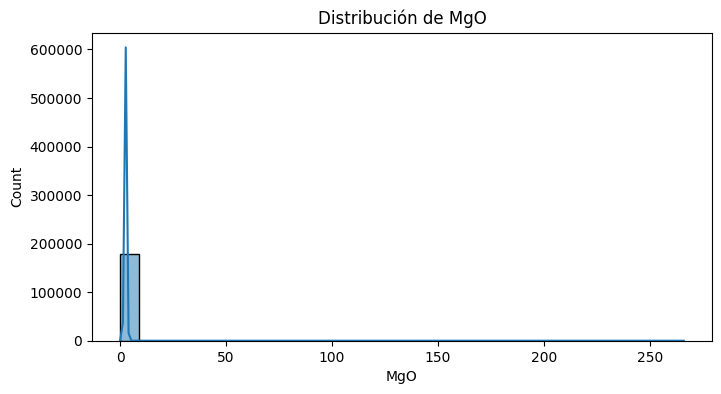

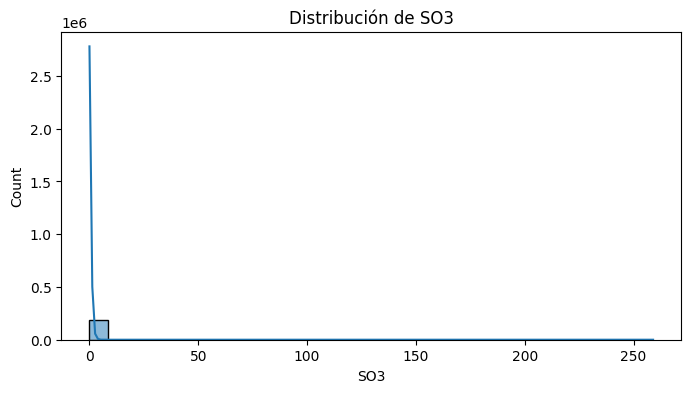

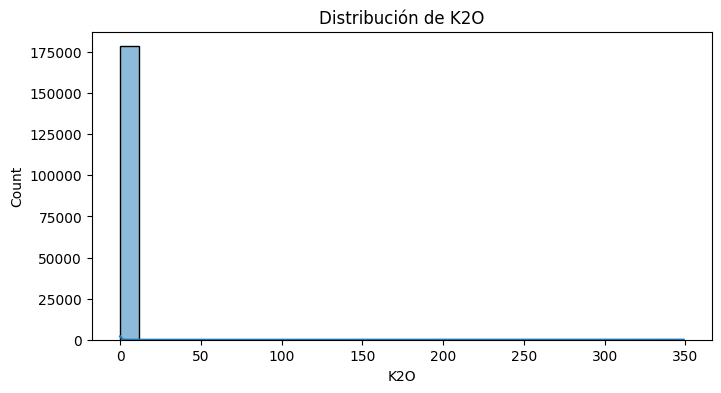

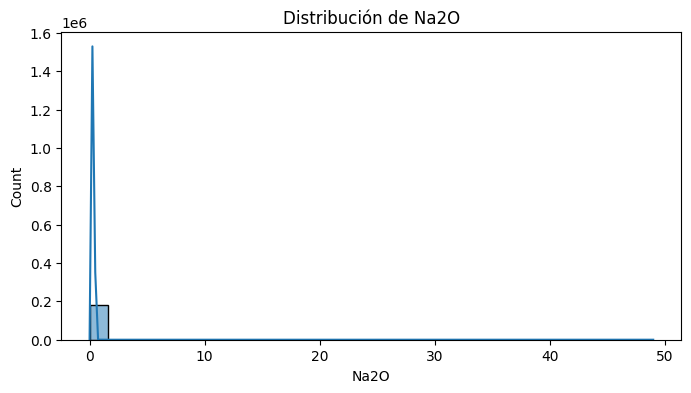

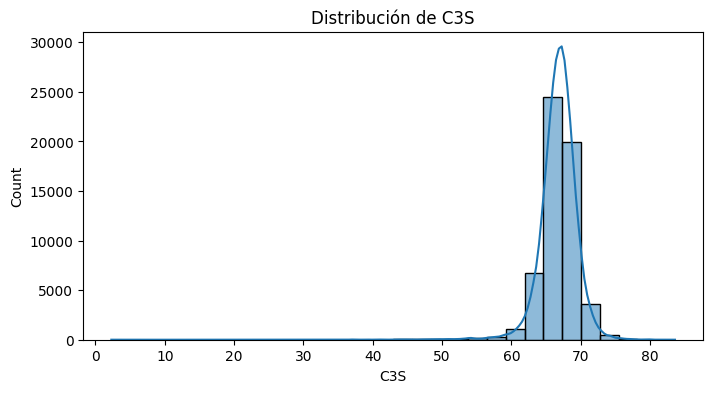

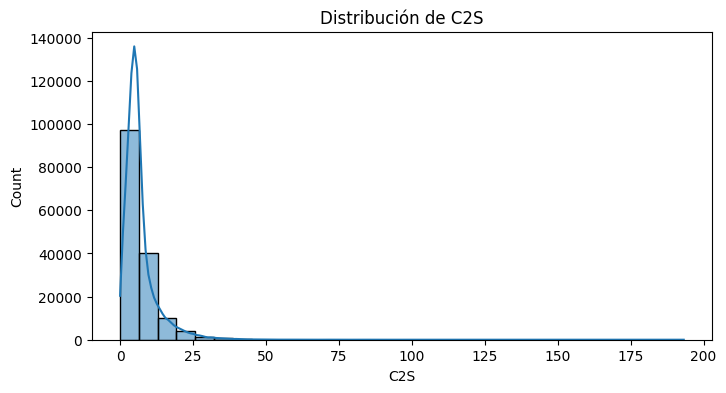

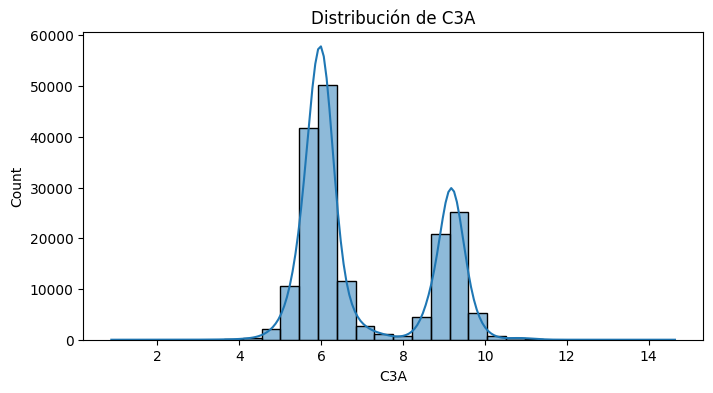

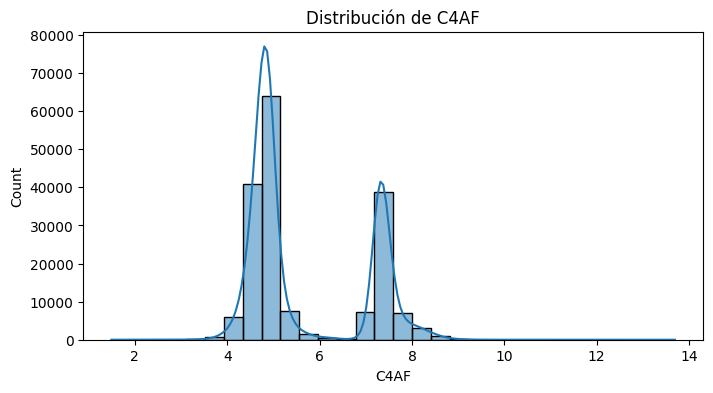

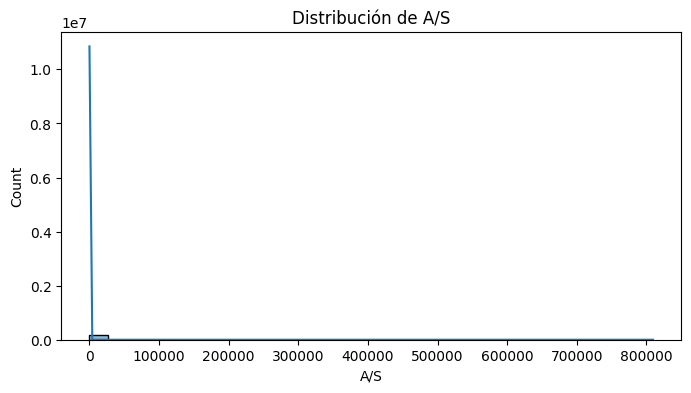

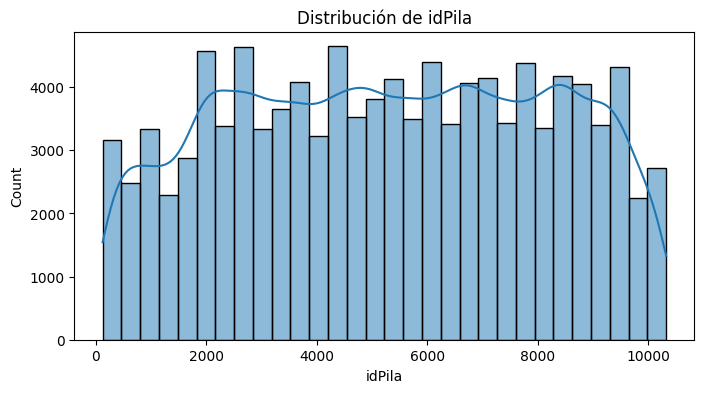

In [19]:
# 4. Visualización de distribuciones de variables numéricas
num_columns = df_QCX.select_dtypes(include=[np.number]).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_QCX[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

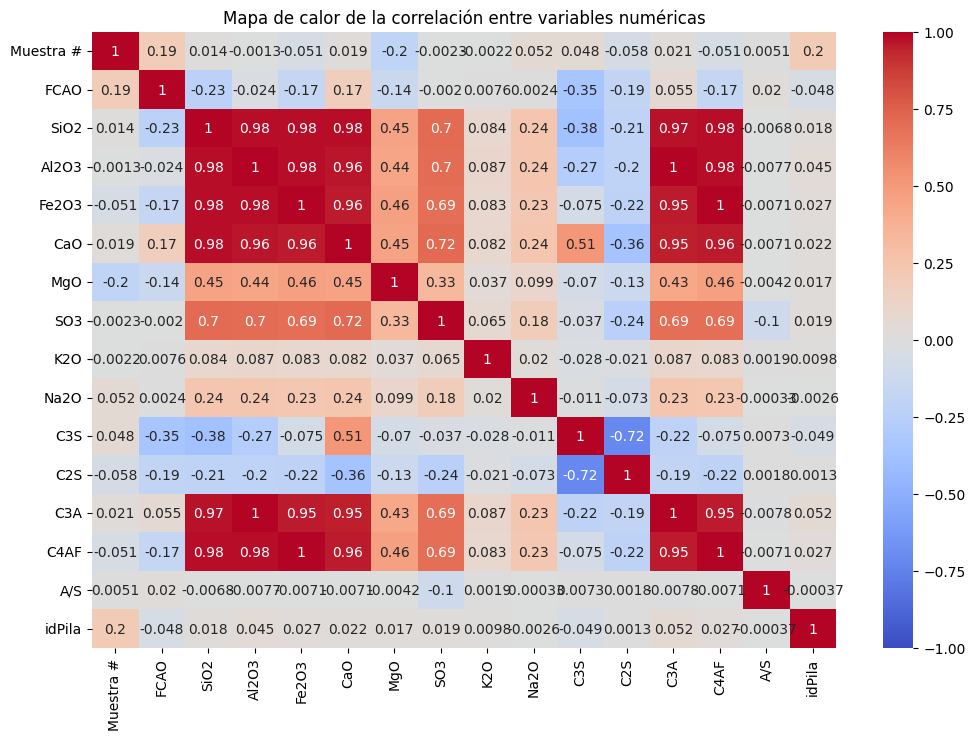

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_QCX.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

In [21]:
%store df_QCX
%store df_pilas

Stored 'df_QCX' (DataFrame)
Stored 'df_pilas' (DataFrame)
